# Applied Data Science Capstone

## Introduction

As the most commonly used transports, automobiles play an important role in daily life. People drive cars to work, study, travel, and even move house. With the widespread use of automobiles, the possibility of traffic accidents increases inevitably. Besides, the environmental factors including weather, location light, and more will also affect the probability of accidents. 

However, sometimes emergency departments are hard to evaluate severity when they received the call from on-site which may cause irreparable loss and even people's death. Based on the situation, predict the severity is one of the crucial points.

To help the people who are involved in the accidents, this project will utilize certain know conditions to predict the severity of the accidents and reduce the risks of accidents happen by taking actions. 

## Data Description 

To address the problem, the weekly collision from 2004 to present in Seattle is going to be used in this case.
The original dataset is a csv file and can be found <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv" target="_blank">here</a>. Also, there is a <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf" target="_blank">metedata from</a> to give   the basic information about the dataset.

There are total 194,673 rows and 38 columns in the dataset. Here is the list of all the columns (features):

|      FIELD     |  TYPE   |      FIELD     |  TYPE   |      FIELD     |  TYPE   |      FIELD     |  TYPE   |
|----------------|---------|----------------|---------|----------------|---------|----------------|---------|
|  SEVERITYCODE  |  int64  |        X       | float64 |        Y       | float64 |    OBJECTID    |  int64  |
|     INCKEY     |  int64  |    COLDETKEY   |  int64  |    REPORTNO    |  object |     STATUS     |  object |
|    ADDRTYPE    |  object |      INTKEY    | float64 |    LOCATION    |  object |  EXCEPTRSNCODE |  object |
| EXCEPTRSNDESC  |  object | SEVERITYCODE.1 |  int64  |  SEVERITYDESC  |  object |  COLLISIONTYPE |  object |
|   PERSONCOUNT  |  int64  |     PEDCOUNT   |  int64  |   PEDCYLCOUNT  |  int64  |     VEHCOUNT   |  int64  |
|     INCDATE    |  object |     INCDTTM    |  object |  JUNCTIONTYPE  |  object |  SDOT_COLCODE  |  int64  |
|  SDOT_COLDESC  |  int64  | INATTENTIONIND |  object |    UNDERINFL   |  object |     WEATHER    |  object |
|    ROADCOND    |  object |    LIGHTCOND   |  object |  PEDROWNOTGRNT |  object |    SDOTCOLNUM  | float64 |
|    SPEEDING    |  object |   ST_COLCODE   |  object |   ST_COLDESC   |  object |    SEGLANEKEY  |  int64  |
|  CROSSWALKKEY  |  int64  |  HITPARKEDCAR  |  object |     |  |      |  |

In this project, the first column "SEVERITYCODE" is the target variable that will be predicted by other fields. According to the metadata file, there are a total of 5 codes that correspond to the severity. However, there are only two types recorded in the dataset: code 1 and code 2. There is 136,485 number of code 1 and it stands for "prop damage". 58,188 observations represent "injury" as code 2.

## Data Preprocessing

In [43]:
# import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# import data
file_path = "/Users/liuqi/Desktop/projects/Coursera_Capstone/Data-Collisions.csv"
df = pd.read_csv(file_path)

/Users/liuqi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df.shape

(194673, 38)

In [46]:
# Check the top 5 rows
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


* Since the "SEVERITYCODE", "SEVERITYCODE.1" as well as the "SEVERITYDESC" describe the same point, only the "SEVERITYCODE" column will be kept. 
* "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "SEGLANEKEY", "CROSSWALKKEY" are the specific keys for incidents which are meaningless in this project, all six columns will be dropped.

In [47]:
# check the na value
nulls = df.isnull().sum() /df.shape[0]*100
nulls = nulls[nulls > 40]
print(nulls)

INTKEY            66.574718
EXCEPTRSNCODE     56.434123
EXCEPTRSNDESC     97.103861
INATTENTIONIND    84.689710
PEDROWNOTGRNT     97.602646
SDOTCOLNUM        40.959455
SPEEDING          95.205807
dtype: float64


* After checking the NA number in each column, there are seven fields that have more than 40% of the missing values including "INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT", "SDOTCOLNUM", SPEEDING". These columns will be dropped in this project.

* The "WEATHER" column is realated to the "ROADCOND" so only "ROADCOND" will be kept
* "X", "Y" columns are describing the geographic point of the "LOCATION" so only "LOCATION" will be kept
* "INCDTTM" includes the information in the "INCDATE" and only "INCDTTM" will be kept
* "SDOT_COLCODE" is similar to "ST_COLCODE" so only "ST_COLCODE" will be kept. "SDOT_COLDESC" and "ST_COLDESC" can be dropped beacuse they are the decripstion of the codes
* "PEDCOUNT" and "PEDCYLCOUNT" are related to "COLLISIONTYPE" and only "COLLISIONTYPE" will be kept
* "ST_COLCODE" includes the information in the "HITPARKEDCAR" so "HITPARKEDCAR" will be dropped
* "JUNCTIONTYPE" is similar to "ADDTYPE" and only "ADDTYPE" will be kept
* "STATUS" is meaningless in this project and will be dropped
* "LOCATION" is too massive in this project and will be dropped

In [48]:
droplist = ['X','Y','OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS', 'INTKEY', 'EXCEPTRSNCODE',
            'LOCATION', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 
            'INCDATE','JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC','INATTENTIONIND', 'WEATHER',
            'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', 
            'HITPARKEDCAR']
for i in droplist:
    del df[i]
print(df.shape)

(194673, 10)


After dropping the columns, there are only 11 columns left:

|      FIELD     |  TYPE   |      FIELD     |  TYPE   |      FIELD     |  TYPE   |      FIELD     |  TYPE   |
|----------------|---------|----------------|---------|----------------|---------|----------------|---------|
|  SEVERITYCODE  |  int64  |    ADDRTYPE    |  object |   ST_COLCODE   |  obejct | COLLISTIONTYPE |  object |
|   PERSONCOUNT  |  int64  |    VEHCOUNT    |  int64  |    INCDTTM     |  object |   UNDERINFL    |  object |
|    ROADCOND    |  object |   LIGHTCOND    |  object |     |   |                |         |

In [49]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,Intersection,Angles,2,2,3/27/13 14:54,N,Wet,Daylight,10
1,1,Block,Sideswipe,2,2,12/20/06 18:55,0,Wet,Dark - Street Lights On,11
2,1,Block,Parked Car,4,3,11/18/04 10:20,0,Dry,Daylight,32
3,1,Block,Other,3,3,3/29/13 09:26,N,Dry,Daylight,23
4,2,Intersection,Angles,2,2,1/28/04 08:04,0,Wet,Daylight,10


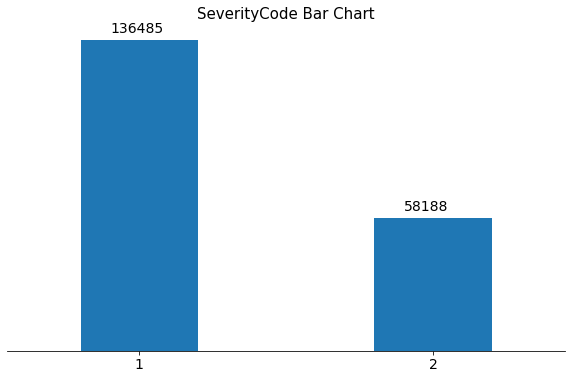

In [50]:
# Briefly check SEVERITYCODE bar chart
ax = df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(10, 6), width=0.4)
#fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14,5)) 
ax.set_title('SeverityCode Bar Chart', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['SEVERITYCODE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+3500),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

In [51]:
# Check NA 
df.isna().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4884
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
dtype: int64

Since there are still many NA values and there are total 194673 records, the rows which contains NA values will be dropped

In [52]:
df = df.dropna(axis=0)
df.shape

(187609, 10)

### Convert data type

In [62]:
df.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
VEHCOUNT          int64
INCDTTM          object
UNDERINFL        object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
dtype: object

In [64]:
#df['ADDRTYPE'].unique()

In [66]:
pd.to_datetime(df['INCDTTM'], format='MM/dd/y HH:mm')

ValueError: time data '3/27/13 14:54' does not match format 'MM/dd/y HH:mm' (match)

In [60]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,Intersection,Angles,2,2,3/27/13 14:54,N,Wet,Daylight,10
1,1,Block,Sideswipe,2,2,12/20/06 18:55,0,Wet,Dark - Street Lights On,11
2,1,Block,Parked Car,4,3,11/18/04 10:20,0,Dry,Daylight,32
3,1,Block,Other,3,3,3/29/13 09:26,N,Dry,Daylight,23
4,2,Intersection,Angles,2,2,1/28/04 08:04,0,Wet,Daylight,10


Since the "INCDTTM" is meaningless but the month and the hour time makes senses, we will extract the month and hour value from the "INCDTTM" column

## Supervised Learning Models

Since this project has a sample of data and desired output "SEVERITYCODE", supervised learning models are going to be used. 

In [53]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [54]:
# split dataset into train and test
X = df[['SEVERITYCODE']]
y = df.loc[:, df.columns != 'SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=21)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,Intersection,Angles,2,2,3/27/13 14:54,N,Wet,Daylight,10
1,1,Block,Sideswipe,2,2,12/20/06 18:55,0,Wet,Dark - Street Lights On,11
2,1,Block,Parked Car,4,3,11/18/04 10:20,0,Dry,Daylight,32
3,1,Block,Other,3,3,3/29/13 09:26,N,Dry,Daylight,23
4,2,Intersection,Angles,2,2,1/28/04 08:04,0,Wet,Daylight,10


In [55]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
reg.score(X_test,y_test)

ValueError: could not convert string to float: 'Block'